In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/
!kaggle datasets download -d gaurav2022/mobile-health
!unzip -o mobile-health.zip

Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
 70% 25.0M/35.5M [00:00<00:00, 131MB/s] 
100% 35.5M/35.5M [00:00<00:00, 131MB/s]
Archive:  mobile-health.zip
  inflating: mhealth_raw_data.csv    


In [ ]:
df = pd.read_csv('/content/mhealth_raw_data.csv')
print("Activity (labels) unique values: ",df['Activity'].unique())
print("Subjects unique values: ",df['subject'].unique())

Activity (labels) unique values:  [ 0  1  2  3  4  6  7  8  9 10 11 12  5]
Subjects unique values:  ['subject1' 'subject2' 'subject3' 'subject4' 'subject5' 'subject6'
 'subject7' 'subject8' 'subject9' 'subject10']


In [ ]:
subsets = []
for activity, count in  df['Activity'].value_counts().items():
    subset = df[df['Activity'] == activity].sample(df['Activity'].value_counts().min())
    subsets.append(subset)

df = pd.concat(subsets)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
476349,-1.27490,-9.71700,1.5639,-0.72171,-0.71670,-0.25147,-0.49506,-7.277400,0.26113,-0.201960,-0.958930,-0.482760,0,subject4
621870,8.28110,0.66994,-18.1550,0.22449,-0.17824,0.88212,-7.16700,-7.515900,7.40550,-0.362750,-0.057495,1.090500,0,subject5
491828,-0.10831,-10.56400,1.0541,-0.41373,-0.80300,-0.44990,-0.91851,-8.498800,3.11670,0.094118,-0.952770,-0.532330,0,subject4
475773,-1.18900,-9.73270,1.9806,-0.70686,-0.71670,-0.24165,-1.25370,-9.570200,1.97980,-0.052941,-0.983570,-0.497840,0,subject4
774405,3.71850,-9.96430,-1.3777,-0.10761,-0.75610,-0.34185,-8.17250,0.731720,7.17200,-0.368630,-1.092400,0.426720,0,subject7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114295,7.80890,-1.38610,2.9775,0.28571,-0.82739,-0.55599,-5.66180,-2.394700,1.52610,-0.611760,0.316220,0.870690,12,subject1
274871,-5.05140,-15.22100,-13.2180,-0.24304,-0.64728,-0.83694,-9.74950,-4.741000,5.89840,-0.933330,-0.579060,-0.073276,12,subject2
274572,6.20380,-17.96200,-19.0130,-0.22820,-0.59475,-0.88605,-1.08670,0.606870,0.68659,-0.668630,-0.874740,-0.131470,12,subject2
378720,-4.71130,-19.48900,-19.1880,-0.56957,-0.81801,-0.40079,0.21165,0.019385,1.93850,-0.784310,-0.242300,-0.637930,12,subject3


# **Visualization**

In [ ]:
label_encoder = LabelEncoder()
df['subject'] = label_encoder.fit_transform(df['subject'])+1

X = df.drop(columns=['Activity'])
cols = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
y = df['Activity']

In [ ]:
X.columns

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'subject'],
      dtype='object')

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca

array([[ 1.97897695, -0.66792893],
       [-2.04157972,  0.29382173],
       [ 1.84350259,  0.0833007 ],
       ...,
       [ 2.34834182, -0.33380611],
       [ 2.6478902 , -0.88421983],
       [ 3.19135705, -2.7494958 ]])

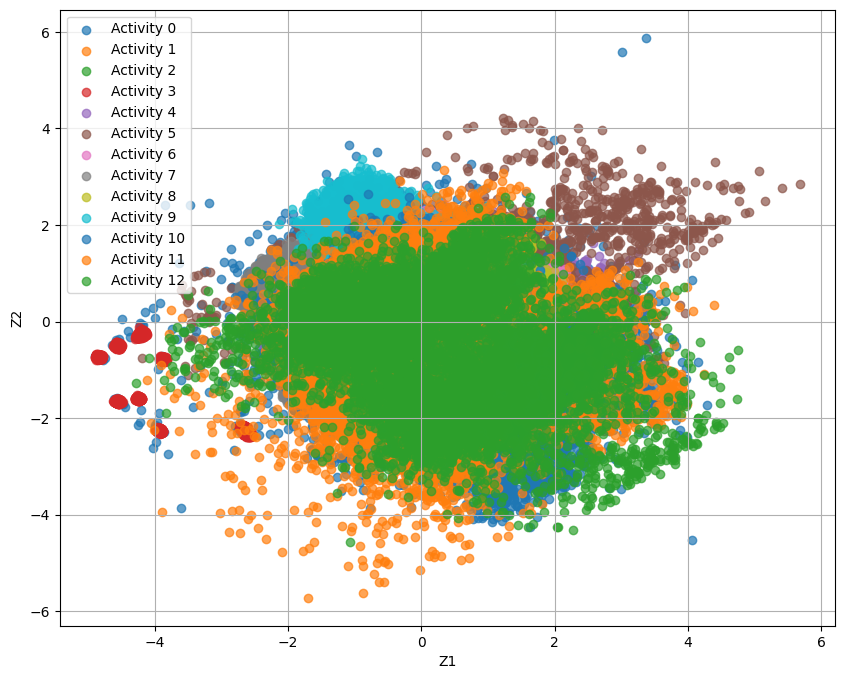

In [ ]:
plt.figure(figsize=(10, 8))
for activity_label in np.unique(y):
    plt.scatter(X_pca[y == activity_label, 0], X_pca[y == activity_label, 1],
                label=f'Activity {activity_label}', alpha=0.7)

plt.xlabel('Z1')
plt.ylabel('Z2')
plt.legend()
plt.grid(True)
plt.show()

# **Models**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject
9904,-0.418939,-0.111701,0.354422,-1.141412,-0.046684,1.331942,0.514988,-0.464673,-0.202392,-1.011820,-0.268595,0.181602,-0.154907
64463,0.755511,-0.391497,-2.720530,0.721571,1.292664,-1.690606,0.535097,-0.308518,0.014886,-1.318365,0.333388,-0.794153,1.230166
111023,-0.568560,0.139628,0.548564,0.360095,-0.835856,-0.608533,0.411536,-0.098401,-0.569874,1.487365,-1.036127,-0.283818,-1.193712
19742,-0.224291,-0.131341,0.280597,-1.395642,-0.466063,0.892060,0.157844,-0.541028,-0.279157,-1.069517,-0.539483,-1.006452,1.576435
10185,-0.050443,-0.145442,0.050285,1.380976,-0.105307,0.434428,0.047723,-0.551723,-1.230357,-1.206558,0.002310,0.242827,1.576435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124223,-1.057418,1.590376,1.475029,-1.073883,0.395265,-1.488315,1.063764,1.640762,-0.950926,-0.449236,-1.024840,-1.222823,-0.847444
77527,2.450956,-1.911453,0.111669,1.138672,-0.393907,-0.487914,-2.951343,1.010805,-0.068798,-1.134442,0.596764,0.736833,-1.539981
132043,4.031533,-1.437755,-2.735714,-0.279435,-0.069230,1.573181,2.635998,-0.579547,-0.370083,-0.063365,-0.215917,1.108351,0.883898
56086,-0.108306,-0.121587,-1.040499,0.364077,-0.898974,0.072584,1.137777,-0.262854,0.978564,2.010295,0.340919,0.716412,0.883898


In [ ]:
# SVM
SVM = SVC(kernel='rbf', random_state=42)
scores = cross_val_score(SVM, X, y, cv=5)
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
confusionMatrix = confusion_matrix(y_test, predictions)

print("SVM Accuracy:", accuracy*100)
print("Cross Validation Accuracy:", scores.mean()*100)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusionMatrix)

SVM Accuracy: 93.89364075864634
Cross Validation Accuracy: 93.93660006405409
Precision: 0.9378149920675701
Recall: 0.9389364075864634
F1 Score: 0.9350507116362168
Confusion Matrix:
[[1154   75   49   31  142  128  110   74  108   76   32   38   51]
 [   0 2068    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2068    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2069    0    0    0    0    0    0    0    0    0]
 [  12    6    0    0 2032    1    4    0   12    0    0    0    2]
 [  53    4    3    0   74 1862   13   10   40    2    1    3    3]
 [   1    1    0    0    0    8 2028   19   11    0    0    0    1]
 [  11   12    0    0    0    0   54 1967   24    1    0    0    0]
 [  12    0    0    0    7    5   10   11 2021    0    0    0    2]
 [   3    0    0    0    0    2    0    0    0 2063    0    0    0]
 [   5    0    0    0    0    1    0    0    0    0 1971   83    9]
 [   6    0    0    0    2    0    0    0    0    0   63 1988    9]
 [ 

In [ ]:
# Logistic Regression
LogisticRegressionModel = LogisticRegression(random_state=42, max_iter=1000, solver='saga', class_weight='balanced', C=0.1)
scores = cross_val_score(LogisticRegressionModel, X_train, y_train, cv=5)
LogisticRegressionModel.fit(X_train, y_train)
y_pred = LogisticRegressionModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusionMatrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression accuracy:", accuracy*100)
print("Cross Validation Accuracy:", scores.mean()*100)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusionMatrix)

Logistic Regression accuracy: 54.33990330978059
Cross Validation Accuracy: 54.764028208111114
Precision: 0.5187456016022418
Recall: 0.5433990330978059
F1-score: 0.5253877223468753
Confusion Matrix:
[[  88  218  223   38  208   70  240  187  242  155  154  107  138]
 [   0 1401    0    0  210    0  368    0   89    0    0    0    0]
 [ 217    0 1078    0    0  214    0  198    0  185    0  176    0]
 [   0    0    0 2069    0    0    0    0    0    0    0    0    0]
 [  44  227   16    0 1093  191  129    2  267    1    4   30   65]
 [ 199  150   93   17  349  573  151   50  294   39   23   32   98]
 [ 100  356    0    0   53    8 1309    5  238    0    0    0    0]
 [  42  240  205   20   52    2  135 1157   16  129    0   23   48]
 [  61  102    0    0  125  221  365    2 1095    4   27   32   34]
 [   1    1    3    0    5    0    0   71  118 1866    0    0    3]
 [  32    0  119    6   17   30    9   18   14    1 1121  353  349]
 [  37    0  189    6   78   91   39   42   50    9  1

In [ ]:
# Linear Regression
linearRegression = LinearRegression()
scores = cross_val_score(linearRegression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X)
mse = mean_squared_error(y, y_pred)

print("MSE:", mse)
print("Cross Validation MSE:", -np.mean(scores))

MSE: 10.657213258403717
Cross Validation MSE: 10.655485791093694


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

confusionMatrix = confusion_matrix(y_test, predictions)

print("KNN accuracy:", accuracy*100)
print("Cross Validation accuracy:", np.mean(scores)*100)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusionMatrix)

KNN accuracy: 95.43696541465229
Cross Validation accuracy: 95.11324315048996
Precision: 0.9547082393460431
Recall: 0.9543696541465229
F1-score: 0.9517028942312741
Confusion Matrix:
[[1309   45   40   27  131   93   66   96   85   69   32   32   43]
 [   0 2068    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0 2067    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2069    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0 2062    1    3    0    0    0    0    0    0]
 [  14    1    1    0   37 1998    4    1    7    1    1    1    2]
 [   2    1    0    0    0    0 2059    7    0    0    0    0    0]
 [   7    1    0    0    0    0    7 2048    5    1    0    0    0]
 [   7    0    0    0    0    0    1    7 2052    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0 2068    0    0    0]
 [   3    0    0    0    3    0    0    0    1    0 2003   53    6]
 [   5    0    0    0    9    0    0    0    0    0  106 1939    9]
 [ 

In [ ]:
# Neaural Network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(13, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16)

precision = precision_score(y_test, np.argmax(predictions, axis=1), average='weighted')
recall = recall_score(y_test, np.argmax(predictions, axis=1), average='weighted')
f1 = f1_score(y_test, np.argmax(predictions, axis=1), average='weighted')
_, test_acc = model.evaluate(X_test,y_test)

print('Test accuracy:', test_acc*100)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, np.argmax(predictions, axis=1)))

Epoch 1/10
6723/6723 [==============================] - 20s 3ms/step - loss: 0.4352 - accuracy: 0.8594
Epoch 2/10
6723/6723 [==============================] - 17s 3ms/step - loss: 0.2325 - accuracy: 0.9293
Epoch 3/10
6723/6723 [==============================] - 17s 2ms/step - loss: 0.1950 - accuracy: 0.9408
Epoch 4/10
6723/6723 [==============================] - 19s 3ms/step - loss: 0.1739 - accuracy: 0.9479
Epoch 5/10
6723/6723 [==============================] - 18s 3ms/step - loss: 0.1611 - accuracy: 0.9526
Epoch 6/10
6723/6723 [==============================] - 19s 3ms/step - loss: 0.1524 - accuracy: 0.9555
Epoch 7/10
6723/6723 [==============================] - 17s 3ms/step - loss: 0.1436 - accuracy: 0.9587
Epoch 8/10
6723/6723 [==============================] - 17s 3ms/step - loss: 0.1362 - accuracy: 0.9609
Epoch 9/10
6723/6723 [==============================] - 18s 3ms/step - loss: 0.1313 - accuracy: 0.9622
Epoch 10/10
841/841 [==============================] - 1s 2ms/step - loss